<a href="https://colab.research.google.com/github/preetamjumech/Tom_Vs_Jerry_CNN_from_Scratch/blob/main/Preeatm_Saha_Tom_vs_Jerry_27_09_2022_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

In [ ]:
!kaggle datasets list -s "Tom and Jerry"

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
balabaskar/tom-and-jerry-image-classification                    Tom and Jerry Image classification                435MB  2022-05-23 12:45:08            494         69  1.0              
yashagrawal300/tom-and-jerry                                     Tom and Jerry                                      45MB  2020-03-19 08:42:44            228          6  0.5882353        
siddharthm1698/tom-and-jerry-cartoon-complete-frames-collection  Tom and Jerry Cartoon Complete Frames Collection  749MB  2021-08-03 13:38:37             99         19  0.875            
yassershrief/video-classification-tutorial                       

In [ ]:
!kaggle datasets download -d "balabaskar/tom-and-jerry-image-classification"

tom-and-jerry-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "/content/tom-and-jerry-image-classification.zip"

In [ ]:
import re, shutil

In [ ]:
try:
  os.makedirs("Train")
  os.makedirs("Train/Tom")
  os.makedirs("Train/Jerry")
except:
  pass

In [ ]:
try:
  os.makedirs("Val")
  os.makedirs("Val/Tom")
  os.makedirs("Val/Jerry")
except:
  pass

In [ ]:
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

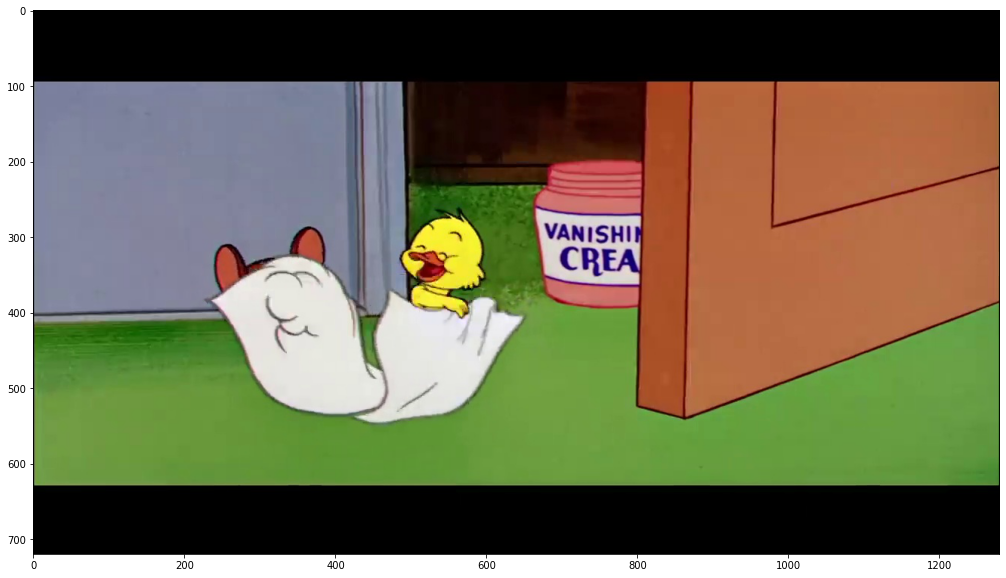

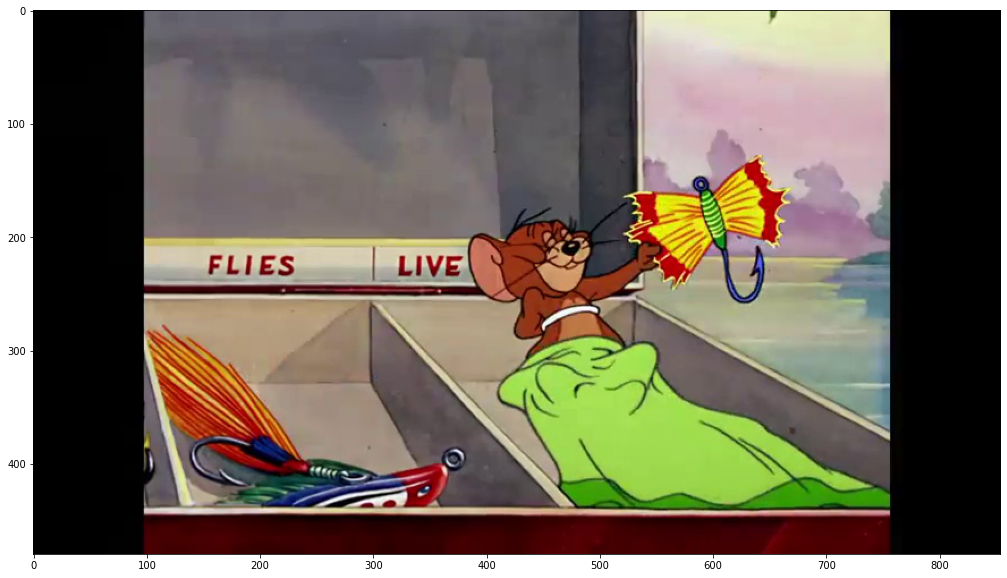

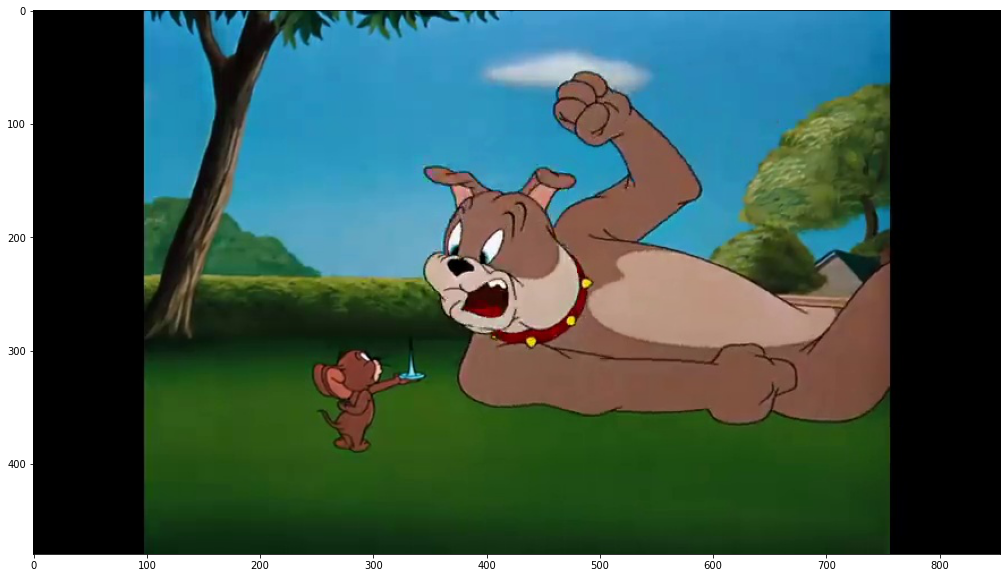

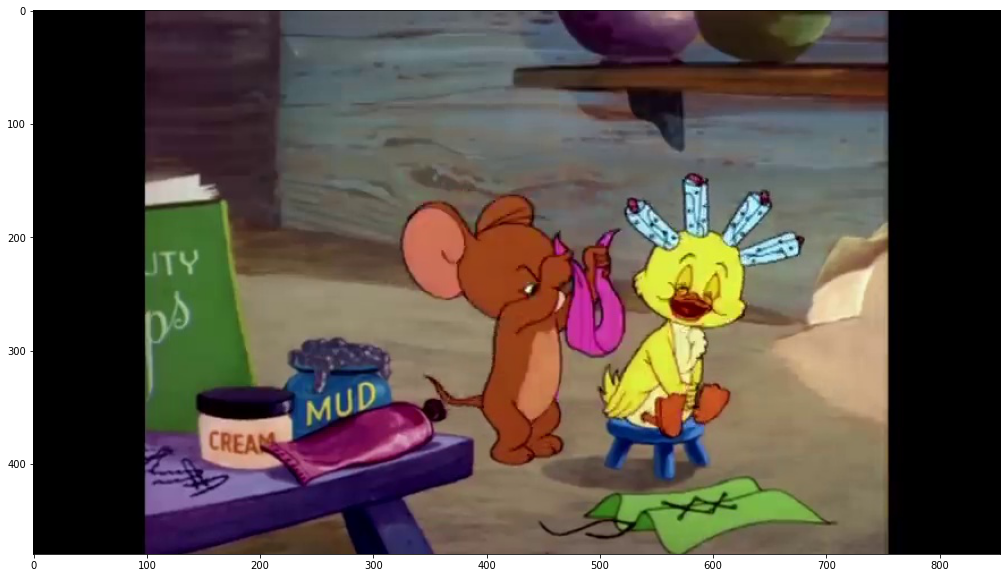

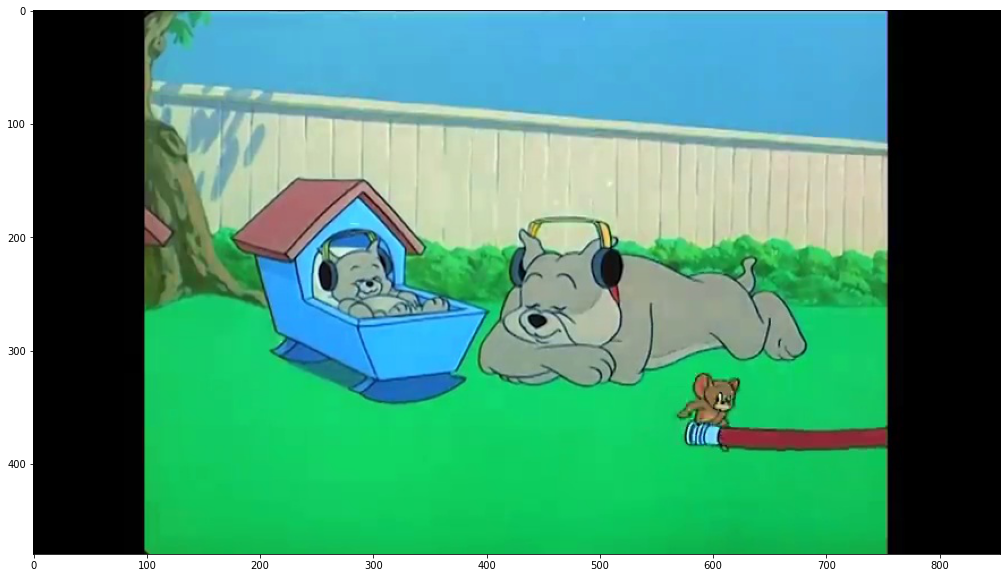

In [ ]:
for i in os.listdir("/content/tom_and_jerry/tom_and_jerry/jerry")[20:25]:
  plt.figure()
  a=Image.open(f"/content/tom_and_jerry/tom_and_jerry/jerry/{i}")
  plt.imshow(a)

In [ ]:
os.listdir("tom_and_jerry/tom_and_jerry/tom")

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/tom"))

1930

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/jerry"))

1240

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/tom_jerry_0"))

1528

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/tom_jerry_1"))

780

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
transf = transforms.Compose([transforms.PILToTensor(), 
                             transforms.Resize(size=(256,256)),
                             transforms.RandomHorizontalFlip(),
                             transforms.RandomVerticalFlip()])

In [ ]:
np.random.seed(0)
tom_index = np.array(range(len(os.listdir('tom_and_jerry/tom_and_jerry/tom'))))
np.random.shuffle(tom_index)

In [ ]:
tom_index

array([ 957, 1126,  491, ..., 1653,  559,  684])

In [ ]:
len(tom_index)

1930

In [ ]:
tom_image_train = np.array(os.listdir('tom_and_jerry/tom_and_jerry/tom'))[tom_index[:1545]]
tom_image_train

array(['frame159.jpg', 'frame891.jpg', 'frame488.jpg', ...,
       'frame963.jpg', 'frame4904.jpg', 'frame3626.jpg'], dtype='<U13')

In [ ]:
tom_image_val = np.array(os.listdir('tom_and_jerry/tom_and_jerry/tom'))[tom_index[1545:]]
tom_image_val

array(['frame5190.jpg', 'frame1367.jpg', 'frame459.jpg', 'frame3845.jpg',
       'frame3756.jpg', 'frame3854.jpg', 'frame4621.jpg', 'frame4725.jpg',
       'frame4457.jpg', 'frame4834.jpg', 'frame5325.jpg', 'frame816.jpg',
       'frame43.jpg', 'frame4162.jpg', 'frame4684.jpg', 'frame948.jpg',
       'frame2870.jpg', 'frame543.jpg', 'frame56.jpg', 'frame1368.jpg',
       'frame3402.jpg', 'frame2945.jpg', 'frame4089.jpg', 'frame2966.jpg',
       'frame3430.jpg', 'frame164.jpg', 'frame2438.jpg', 'frame5413.jpg',
       'frame137.jpg', 'frame5469.jpg', 'frame2664.jpg', 'frame2931.jpg',
       'frame390.jpg', 'frame951.jpg', 'frame5109.jpg', 'frame3472.jpg',
       'frame4865.jpg', 'frame4578.jpg', 'frame210.jpg', 'frame1138.jpg',
       'frame2892.jpg', 'frame573.jpg', 'frame2885.jpg', 'frame1225.jpg',
       'frame2406.jpg', 'frame5181.jpg', 'frame574.jpg', 'frame2110.jpg',
       'frame5324.jpg', 'frame5243.jpg', 'frame3492.jpg', 'frame572.jpg',
       'frame142.jpg', 'frame449.jpg', 'f

In [ ]:
np.random.seed(0)
jerry_index = np.array(range(len(os.listdir('tom_and_jerry/tom_and_jerry/jerry'))))
np.random.shuffle(jerry_index)

In [ ]:
jerry_index

array([1030,  124,  184, ..., 1216,  559,  684])

In [ ]:
len(jerry_index)

1240

In [ ]:
jerry_image_train = np.array(os.listdir('tom_and_jerry/tom_and_jerry/jerry'))[jerry_index[:995]]
jerry_image_train

array(['frame1110.jpg', 'frame2390.jpg', 'frame2178.jpg', 'frame1643.jpg',
       'frame744.jpg', 'frame769.jpg', 'frame4830.jpg', 'frame2391.jpg',
       'frame3039.jpg', 'frame3616.jpg', 'frame1793.jpg', 'frame4304.jpg',
       'frame2909.jpg', 'frame1125.jpg', 'frame4738.jpg', 'frame5079.jpg',
       'frame1430.jpg', 'frame3033.jpg', 'frame4412.jpg', 'frame1084.jpg',
       'frame3841.jpg', 'frame3681.jpg', 'frame2796.jpg', 'frame2320.jpg',
       'frame4882.jpg', 'frame1333.jpg', 'frame2072.jpg', 'frame2385.jpg',
       'frame2056.jpg', 'frame3550.jpg', 'frame1975.jpg', 'frame5246.jpg',
       'frame613.jpg', 'frame3509.jpg', 'frame3526.jpg', 'frame3453.jpg',
       'frame4890.jpg', 'frame4413.jpg', 'frame1312.jpg', 'frame1311.jpg',
       'frame4679.jpg', 'frame3250.jpg', 'frame4542.jpg', 'frame5132.jpg',
       'frame1198.jpg', 'frame2833.jpg', 'frame316.jpg', 'frame336.jpg',
       'frame3109.jpg', 'frame5249.jpg', 'frame2179.jpg', 'frame2211.jpg',
       'frame2943.jpg', 'frame

In [ ]:
jerry_image_val = np.array(os.listdir('tom_and_jerry/tom_and_jerry/jerry'))[jerry_index[995:]]
jerry_image_val

array(['frame5344.jpg', 'frame2196.jpg', 'frame2207.jpg', 'frame1163.jpg',
       'frame2306.jpg', 'frame1203.jpg', 'frame2357.jpg', 'frame1993.jpg',
       'frame306.jpg', 'frame3438.jpg', 'frame3969.jpg', 'frame4465.jpg',
       'frame869.jpg', 'frame1033.jpg', 'frame1164.jpg', 'frame3670.jpg',
       'frame5247.jpg', 'frame1321.jpg', 'frame1789.jpg', 'frame312.jpg',
       'frame3937.jpg', 'frame2227.jpg', 'frame1968.jpg', 'frame4319.jpg',
       'frame2942.jpg', 'frame5101.jpg', 'frame2835.jpg', 'frame2006.jpg',
       'frame2910.jpg', 'frame3001.jpg', 'frame1632.jpg', 'frame2305.jpg',
       'frame4405.jpg', 'frame3038.jpg', 'frame1635.jpg', 'frame801.jpg',
       'frame4101.jpg', 'frame4541.jpg', 'frame1749.jpg', 'frame5136.jpg',
       'frame4104.jpg', 'frame860.jpg', 'frame2008.jpg', 'frame3098.jpg',
       'frame1645.jpg', 'frame4484.jpg', 'frame2189.jpg', 'frame3105.jpg',
       'frame5391.jpg', 'frame1592.jpg', 'frame2212.jpg', 'frame4469.jpg',
       'frame1162.jpg', 'frame

In [ ]:
for file in tom_image_train:
  shutil.copy('tom_and_jerry/tom_and_jerry/tom/'+file, 'Train/Tom/'+file)

In [ ]:
for file in tom_image_val:
  shutil.copy('tom_and_jerry/tom_and_jerry/tom/'+file, 'Val/Tom/'+file)

In [ ]:
for file in jerry_image_train:
  shutil.copy('tom_and_jerry/tom_and_jerry/jerry/'+file, 'Train/Jerry/'+file)

In [ ]:
for file in jerry_image_val:
  shutil.copy('tom_and_jerry/tom_and_jerry/jerry/'+file, 'Val/Jerry/'+file)

In [ ]:
train_loader = DataLoader(ImageFolder("Train",transform = transf),batch_size=32,shuffle=True)

In [ ]:
val_loader = DataLoader(ImageFolder("Val",transform = transf),batch_size=128,shuffle=False)

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam

In [ ]:
class Tom_Vs_Jerry(nn.Module):
  def __init__(self):
    super(Tom_Vs_Jerry,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1) #in_channels=RGB(3),out_channels=no of filters
    self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1) #kernel_size=3, padding =1 ,same size
    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1)
    self.bn2 = nn.BatchNorm2d(num_features=16) #for 2
    self.bn3 = nn.BatchNorm2d(num_features=32)
    self.bn4 = nn.BatchNorm2d(num_features=64)
    self.drop = nn.Dropout() #dont have parametrs to be learned. so defining only once
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #dont have parametrs to be learned. so defining only once
    self.fc1 = nn.Linear(in_features=8*8*256,out_features=512)
    self.fc2 = nn.Linear(in_features=512,out_features=64)
    self.fc3 = nn.Linear(in_features=64,out_features=2)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) #size = 128

    x = self.bn2(x) #batchnormalization, conv, pooling
    x= F.relu(self.conv2(x))
    x = self.pool(x) #size = 64
 
    x = self.bn3(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x) #size = 32

    x = self.bn4(x)
    x = F.relu(self.conv4(x))
    x = self.pool(x) #size = 16
    x = self.drop(x) 
    
    x = F.relu(self.conv5(x))
    x = self.pool(x) #size = 8

    x = x.view(x.size()[0],-1)
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    
    return x

In [ ]:
model = Tom_Vs_Jerry()

In [ ]:
opt = Adam(model.parameters(), lr=0.0001)

In [ ]:
import torchsummary

In [ ]:
torchsummary.summary(model, input_size=(3,256,256),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
         MaxPool2d-2         [-1, 16, 128, 128]               0
       BatchNorm2d-3         [-1, 16, 128, 128]              32
            Conv2d-4         [-1, 32, 128, 128]           4,640
         MaxPool2d-5           [-1, 32, 64, 64]               0
       BatchNorm2d-6           [-1, 32, 64, 64]              64
            Conv2d-7           [-1, 64, 64, 64]          18,496
         MaxPool2d-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10          [-1, 128, 32, 32]          73,856
        MaxPool2d-11          [-1, 128, 16, 16]               0
          Dropout-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-14            [-1, 25

In [ ]:
from tqdm import tqdm

In [46]:
def train(model, train_loader, opt):
    train_loss = 0.0
    model.train()
    for batch, target in tqdm(train_loader):
        # batch = batch.float().to('cuda')
        # target = target.to('cuda')

        opt.zero_grad()
        output = model(batch.float())
        loss = F.cross_entropy(output, target)
        loss.backward()
        opt.step()
        train_loss += loss.item()

    return train_loss

In [49]:
def validate(model, val_loader, opt):
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for batch, target in tqdm(val_loader):
            # batch = batch.float().to('cuda')
            # target = target.to('cuda')

            output = model(batch.float())
            loss = F.cross_entropy(output, target)
            val_loss += loss.item()
    return val_loss

In [50]:
#model = model.to('cuda')
hist = {'train_loss':[], 'val_loss':[]}
for epoch in range(1):
    hist['train_loss'].append(train(model, train_loader,opt))
    hist['val_loss'].append(validate(model, val_loader,opt))

100%|██████████| 5/5 [00:31<00:00,  6.26s/it]
